# Sant Boi Buildings Energy Consumption

## Context 

A dataset of buildings from Sant Boi de Llobregat was collected and an energy consumption model (a physical and static one) was implemented to get an estimate of annual energy consumption for each building[[1]](https://issuu.com/sergioleonardopinzon/docs/dossier_re-pensar_lo_edificado_mism).

A considerable amount of data about building stock in Spain is already a public asset, which can be accessed via [Catastro](http://www.catastro.meh.es/). However, that doesn't happen when it comes to data about energy consumption. 

Sustainability implies governance. Public data is an important tool these days to enable transparency and informed decission making. This is of great importance when it comes to public energy policies, which deeply determine our environmental and social systems. In order to protect our ecosystems and engage citizens with policy making, data must be accesible.

There are already some initiatives aligned in the same direction of the present project such as [urbanZEB](http://urbanzeb.com/) and [this study of energy consumption in the Municipality of Rubí](http://rubienergia.300000kms.net/).

For a more detailed description of the context of this project [clic here](https://github.com/carlosdavila91/santboi_eda).

## Goals

This notebook aims to explore strengths (and weaknesses) of data and Machine Learning models regarding sustainable urban planning and energy consumption.

Therefore, the main goals of this project are:

* Mainly, practicing Machine Learning
* Implementing a model to predict energy consumption.

Other ideas that arose when doing this excercise:

* Explore the possibility of a model to classify buildings regarding their potential to be susceptible of an renovation.
* Explore the viability of a model to detect errors in data collection related to buildings.

This type of models could help to design strategies of building renovation aligned with the [EU 2050 goals](https://ec.europa.eu/clima/policies/strategies/2050_es). (AÑADIR ALGO SOBRE LA DIMENSIÓN SOCIAL DE LOS MODELOS)

Hence, demographic, social variables and others related to weather (temperature, precipitation, rise and sundown hours) could have been taken into account to enrich the mentioned models. The time dimension could be included, and thus, get a more accurate prediction of energy consumption. However, this goes beyond the scope and aim of the study. Those kind of variables would essential to be taken into account in a model which would be trying to explain a real energy consumption which would show an enormous variability subject to such factors.

## Performance measure

The performance measure is an indicator that gives an idea of how much error the system tipically makes in its predictions. It is well defined in the picture bellow.

![](img/error.png)

The performance measure selected for this project is Root Mean Squared Error (RMSE). It is described as follows:

$$RMSE(X,h)=\sqrt{\frac{1}{m}\sum^m_{i=1}(h(x^{(i)}) - y^{(i)})^2}$$

Where,

* $X$ is the matrix containing all the features, excluding the label or target variable
* $h$ is the hypothesis, i.e., the model function
* $m$ is the length of the dataset, i.e., the number of instances or builgings in it
* $x^{(i)}$ is a vector of all the feature values (excluding the label) of the $i^{th}$ instance in the dataset. Hence, $h(x^{(i)})$ gives us the "predicted $y$"
* $y$ is the real target value

This performance measure imputes higher weight for large errors.

## Asumptions

In order to explore the potential of Machine Lerning models in this context, it is asumed that the energy consumption variable is real rather than an estimation.

It is assumed that anyone that reach this notebook will have some basic familiarity with python and Machine Learning. Just in case, it is going to be written to be as accessible as possible to someone with little to no knoweledge to them.

![](img/ml-explained.jpeg)

Sometimes, variables are refered as attributes or features.

## Attributes

The attributes in the dataset are the following:

01.  **X Coord**: Geographic X coordinate, in ETRS89 system
02.  **Y Coord**: Geographic Y coordinate, in ETRS89 system
03.  **District**: Name of the district where the building locates
04.  **Year**: year of construction
05.  **Main Orientation**: orientation of the main facade of the building (N, S, E, W, NE, NW, SE, SW)
06.  **GF Usage**: Ground floor usage (dwelling, commercial, storage and industrial)
07.  **Roof Surface**: squared meters of roof
08.  **Facade Surface**: squared meters of facade
09.  **Openings Surface**: squared meters of openings (windows and doors)
10.  **Wrapping Surface**: squared meters of all surfaces wrapping the building
11.  **Party Wall Surface**: squared meters of party wall
12.  **Contact w/Terrain Surface**: squared meters of surface in contact with terrain
13.  **Type of Roof**: type of roof (C1, C2, C3 and C4)*
14.  **Type of Opening**: type of opening (H1, H2, H3 and H4)*
15.  **Type of Party Wall**: type of party wall (M1 and M2)*
16.  **Type of Facade**: type of facade (F1, F2 and F3)*
17.  **Number of Floors**: number of floors of the buildings
18.  **Number of Courtyards**: number of internal courtyards of the building
19.  **Number of Dwellings**: number of dwellings in the building
20.  **Heat Demand**: Heat Demand of the entire building in kWh/y

*Go [here](https://github.com/carlosdavila91/santboi_eda) for more info about attributes.

## Configuration

In [1]:
!source my_env/bin/activate

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import stats

# for inline plots
%matplotlib inline
%config InlineBackend.figure_format ='retina'

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rc('xtick', labelsize = 12) 
mpl.rc('ytick', labelsize = 12)
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 12
sns.set(style = 'whitegrid', palette = 'Set3', font_scale = 1)

In [3]:
# Get data from csv
buildings = pd.read_csv("../santboi/data/1906SB_collection_heatd.csv")

## Quick Data Exploration

In [4]:
print('FULL DATA')
print('Data has {:.0f} columns'.format(buildings.shape[1]))
print('Number of rows: {:.0f}'.format(buildings.shape[0]))

cnt = 0
# print out the features
print('\nFeatures: ')
for feature in buildings.columns:
    cnt += 1
    if cnt < 10:
        print('0{}. '.format(cnt), feature,'\t')
    else:
        print('{}. '.format(cnt), feature,'\t')

FULL DATA
Data has 20 columns
Number of rows: 814

Features: 
01.  X Coord 	
02.  Y Coord 	
03.  District 	
04.  Year 	
05.  Main Orientation 	
06.  GF Usage 	
07.  Roof Surface 	
08.  Facade Surface 	
09.  Openings Surface 	
10.  Wrapping Surface 	
11.  Party Wall Surface 	
12.  Contact w/Terrain Surface 	
13.  Type of Roof 	
14.  Type of Opening 	
15.  Type of Party Wall 	
16.  Type of Facade 	
17.  Number of Floors 	
18.  Number of Courtyards 	
19.  Number of Dwellings 	
20.  Heat Demand 	


Print the data to see how it looks like

In [5]:
buildings.head()

,X Coord,Y Coord,District,Year,Main Orientation,GF Usage,Roof Surface,Facade Surface,Openings Surface,Wrapping Surface,Party Wall Surface,Contact w/Terrain Surface,Type of Roof,Type of Opening,Type of Party Wall,Type of Facade,Number of Floors,Number of Courtyards,Number of Dwellings,Heat Demand
0,2.032087,41.348370,Marianao,1977,E,Commercial,165.43,208.50,56.1150,1473.28,150.9,150.00,C2,H4,M2,F3,5,1,5,44.251546
1,2.032074,41.348412,Marianao,1978,W,Commercial,417.41,547.35,218.9400,2524.31,36.6,420.00,C2,H3,M2,F3,5,2,19,38.328312
2,2.032024,41.348669,Marianao,1976,E,Commercial,202.00,282.00,112.8000,1637.97,108.9,202.07,C2,H3,M2,F3,5,2,14,58.794629
3,2.043332,41.338324,Vinyets,1959,NW,Dwelling,96.00,148.80,38.4024,489.60,0.0,96.00,C1,H3,0,F1,3,0,2,126.321738
4,2.043382,41.338281,Vinyets,1958,NE,Dwelling,45.00,61.38,18.4170,418.31,0.0,80.00,C1,H4,0,F1,2,1,2,69.562085


Data types

In [6]:
print('ORIGINAL DATA:')
buildings.info(null_counts=True)

ORIGINAL DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X Coord                    746 non-null    float64
 1   Y Coord                    746 non-null    float64
 2   District                   814 non-null    object 
 3   Year                       814 non-null    int64  
 4   Main Orientation           814 non-null    object 
 5   GF Usage                   814 non-null    object 
 6   Roof Surface               814 non-null    float64
 7   Facade Surface             814 non-null    float64
 8   Openings Surface           814 non-null    float64
 9   Wrapping Surface           814 non-null    float64
 10  Party Wall Surface         814 non-null    float64
 11  Contact w/Terrain Surface  814 non-null    float64
 12  Type of Roof               814 non-null    object 
 13  Type of Opening            814 non-

Let's see what categorical data contains and with what frequency.

In [7]:
buildings["District"].value_counts()

Marianao        494
Vinyets         315
Camps Blancs      5
Name: District, dtype: int64

This is an important variable, as we the approach of the study is highly dependent on the terreitory.

The categories in variables inspected bellow have an order importance from the physical point of view. E.g., being oriented to S is better than N, or being a small sized building (in terms of dwellings) account for a higher energy demand for HVAC systems.

In [8]:
buildings["Main Orientation"].value_counts()

N     134
S     131
E     109
W     106
SE     98
NE     86
NW     79
SW     71
Name: Main Orientation, dtype: int64

In [9]:
buildings["GF Usage"].value_counts()

Dwelling      401
Commercial    355
Storage        41
Industrial     17
Name: GF Usage, dtype: int64

The same occurs with the following, where categories are a direct representation of the physical characteristics of the corresponding wrapping surface.

Let's see some statistics.

In [10]:
buildings.describe()

,X Coord,Y Coord,Year,Roof Surface,Facade Surface,Openings Surface,Wrapping Surface,Party Wall Surface,Contact w/Terrain Surface,Number of Floors,Number of Courtyards,Number of Dwellings,Heat Demand
count,746.000000,746.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,2.037112,41.344455,1958.713759,188.012064,283.197881,92.051687,1174.339019,89.446564,191.163845,3.819410,1.067568,8.509828,78.686759
std,0.005807,0.004975,24.095145,162.277031,346.681371,154.381926,991.088501,144.038287,166.748749,1.811693,1.209477,10.797443,41.569118
min,2.028457,41.334829,1700.000000,30.080000,14.280000,2.570000,150.920000,0.000000,38.610000,1.000000,0.000000,1.000000,5.977362
25%,2.032491,41.339325,1958.000000,91.000000,77.334300,18.899490,494.850000,0.000000,93.812500,2.000000,0.000000,1.000000,48.330863
50%,2.034446,41.346671,1967.000000,129.565000,157.920000,40.266405,851.655000,33.985500,131.500000,4.000000,1.000000,4.000000,69.391495
75%,2.043433,41.349227,1973.000000,224.587500,344.475000,94.001554,1497.847500,117.810000,225.532500,5.000000,2.000000,12.000000,99.243290
max,2.046343,41.352760,1979.000000,1367.000000,2765.940000,1795.254000,6159.730000,1287.270000,1405.000000,8.000000,7.000000,83.000000,233.075410


Complemented with plots.

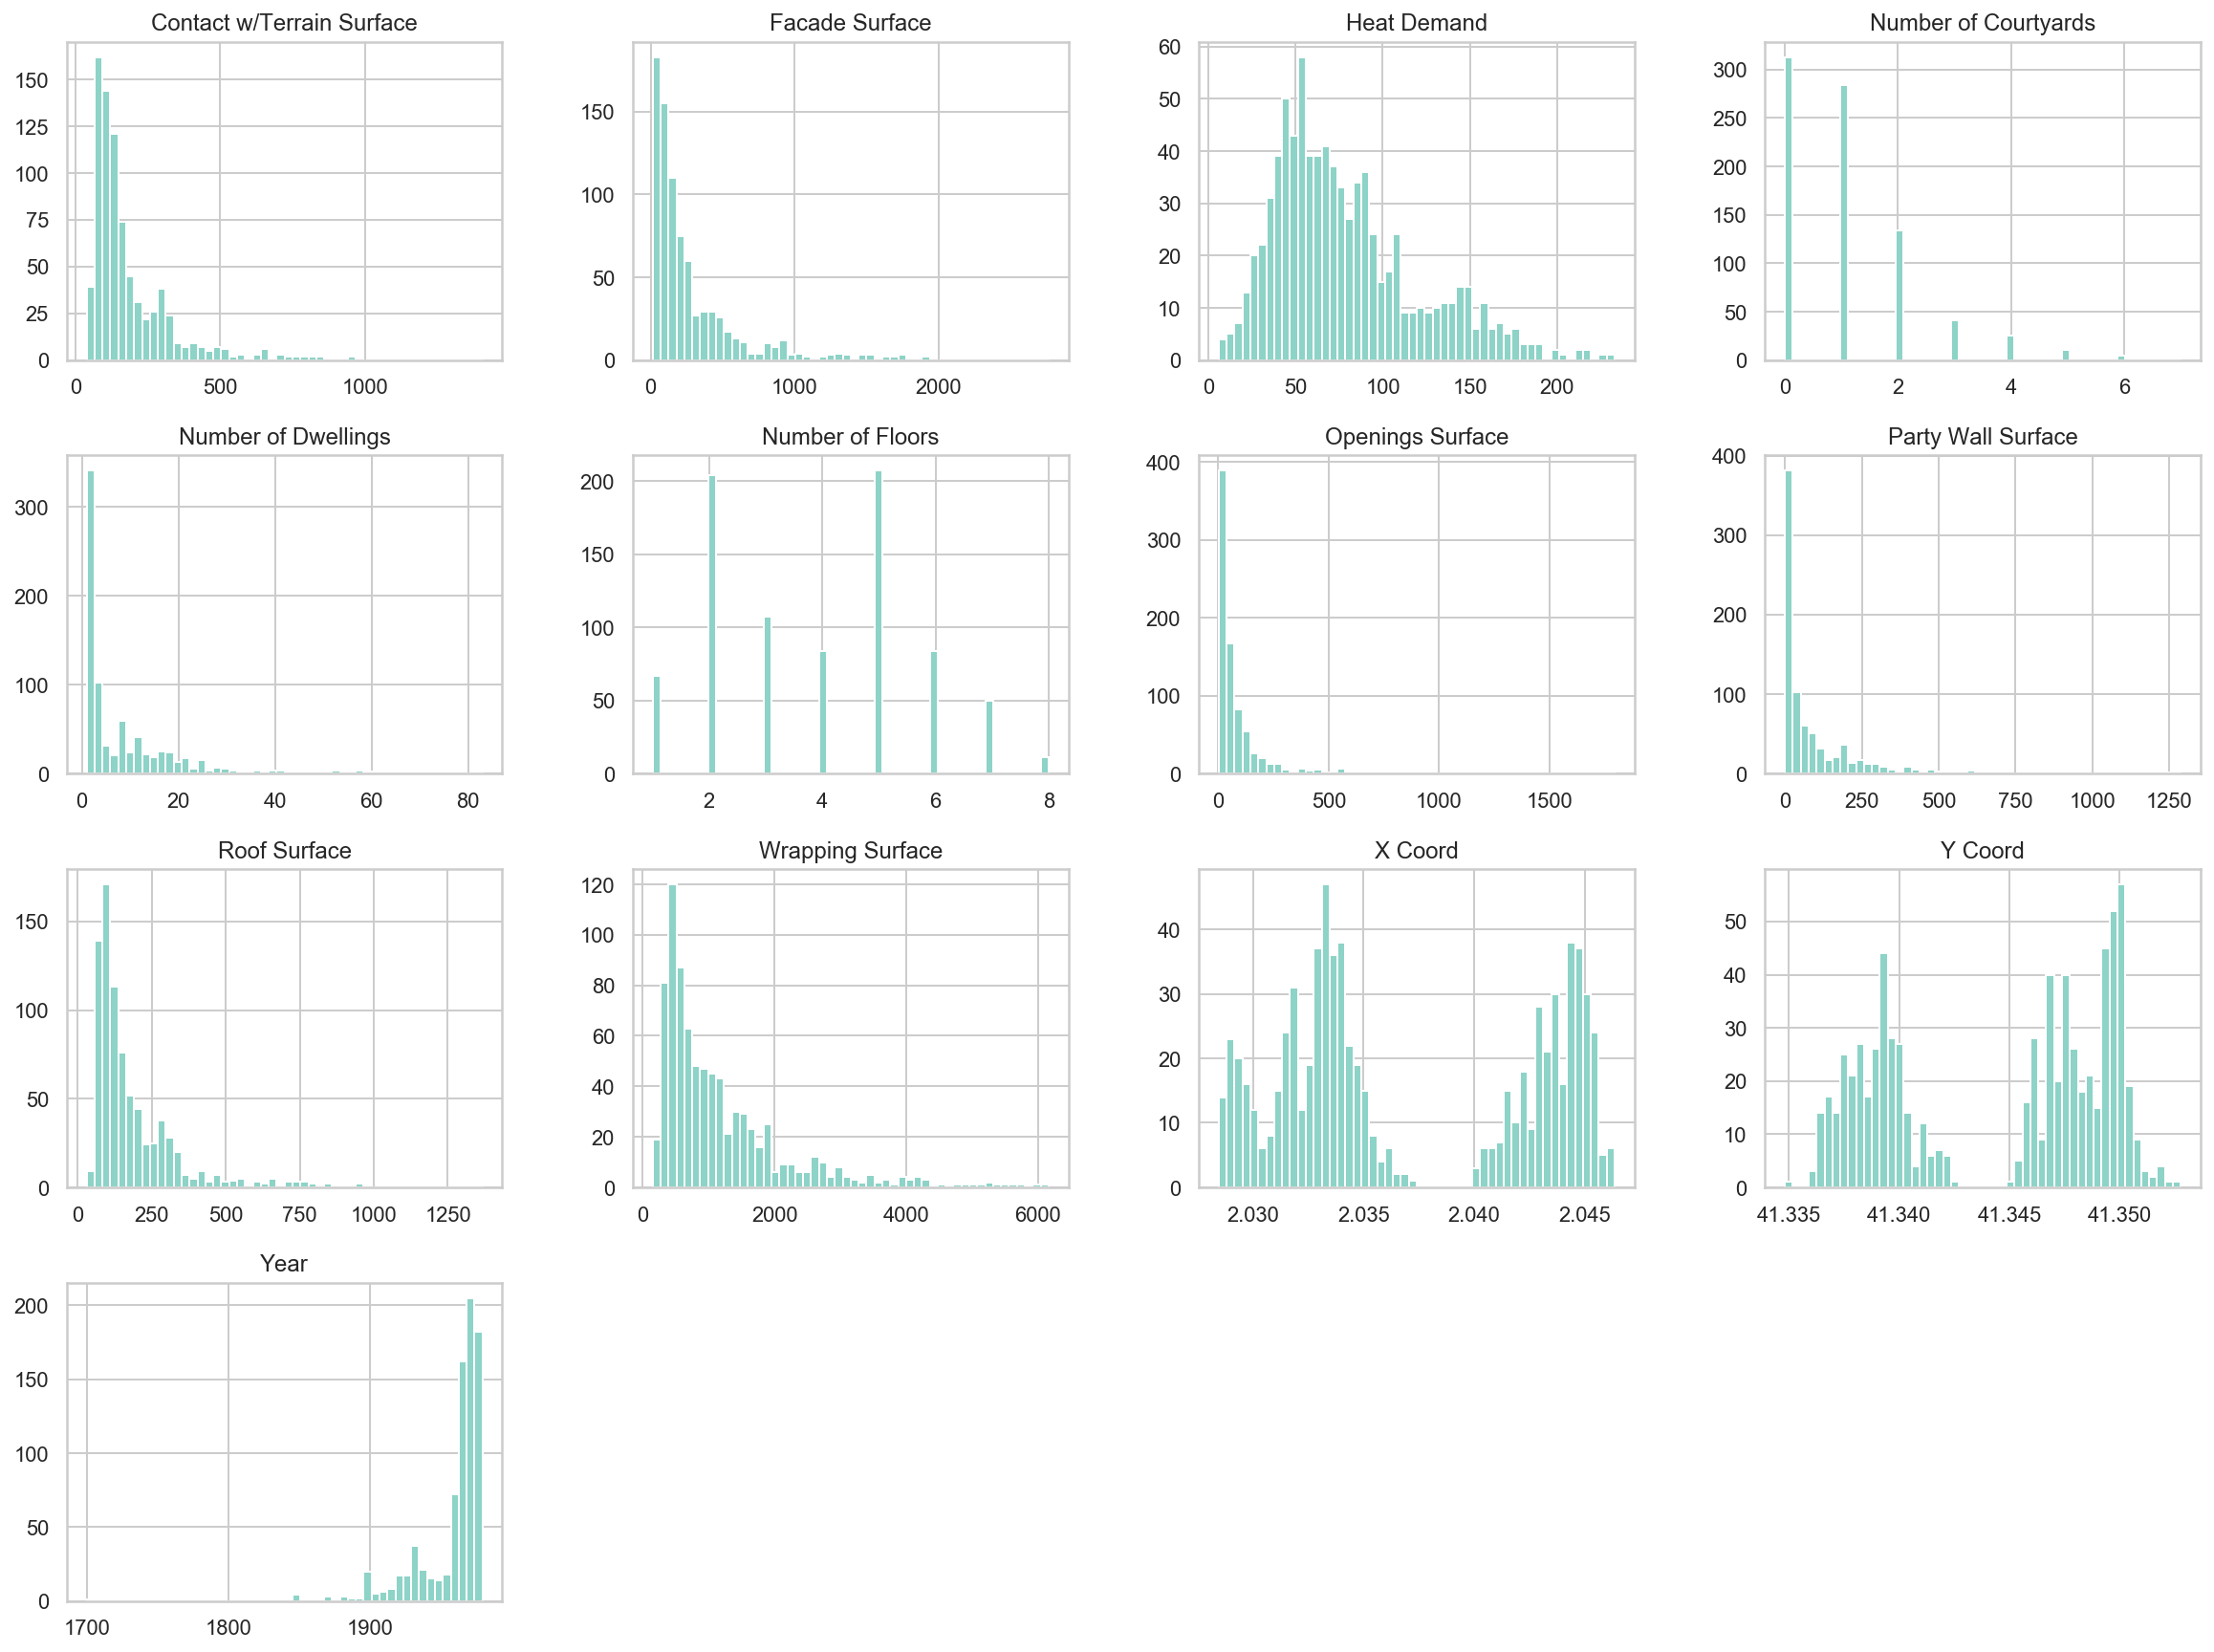

In [11]:
buildings.hist(bins=50, figsize=(20,15))
plt.show()

Now we can observe some peculiarities in data:

* Most buildings have 2 or 5 heights
* Distributions are _tail-heavy_
* The Attributes have different scales
* Heat demand shows a bimodal distribution (i.e., two peaks) which indicates an important category to be producing this difference.

# Create the Test Set

As indicated before, the approach of this study is territory-wise. This must be taken into account when splitting the dataset in the train and test set. Data in both sets must be representative of each District.

As will be seen later, another fundamental variable will be the `Number of Floors` of buildings. Hence, data must be stratifyed in relation to this variable too.

Here, the proportions in the whole dataset for both variables.

In [12]:
print("DISTRICT PROPORTIONS:")
buildings["District"].value_counts(normalize=True)

DISTRICT PROPORTIONS:


Marianao        0.606880
Vinyets         0.386978
Camps Blancs    0.006143
Name: District, dtype: float64

In [13]:
print("NUMBER OF FLOORS PROPORTIONS:")
buildings["Number of Floors"].value_counts(normalize=True)

NUMBER OF FLOORS PROPORTIONS:


5    0.254300
2    0.250614
3    0.131450
6    0.103194
4    0.103194
1    0.082310
7    0.061425
8    0.013514
Name: Number of Floors, dtype: float64

Now we are prepared to implement **Scikit-Learn's** `StratifiedShuffleSplit` class:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(buildings, buildings.loc[:,("District", "Number of Floors")]):
    buildings_train_set = buildings.loc[train_index]
    buildings_test_set = buildings.loc[test_index]

In [15]:
print("DISTRICT PROPORTIONS IN TEST SET:")
buildings_test_set["District"].value_counts(normalize=True)

DISTRICT PROPORTIONS IN TEST SET:


Marianao    0.607362
Vinyets     0.392638
Name: District, dtype: float64

In [16]:
print("NUMBER OF FLOORS PROPORTIONS IN TEST SET:")
buildings_test_set["Number of Floors"].value_counts(normalize=True)

NUMBER OF FLOORS PROPORTIONS IN TEST SET:


5    0.257669
2    0.245399
3    0.128834
6    0.104294
4    0.104294
1    0.085890
7    0.061350
8    0.012270
Name: Number of Floors, dtype: float64

# Exploring Data Visually to Gain Insights

This exploration is performed over the training data to avoid early catching patterns in the test data.

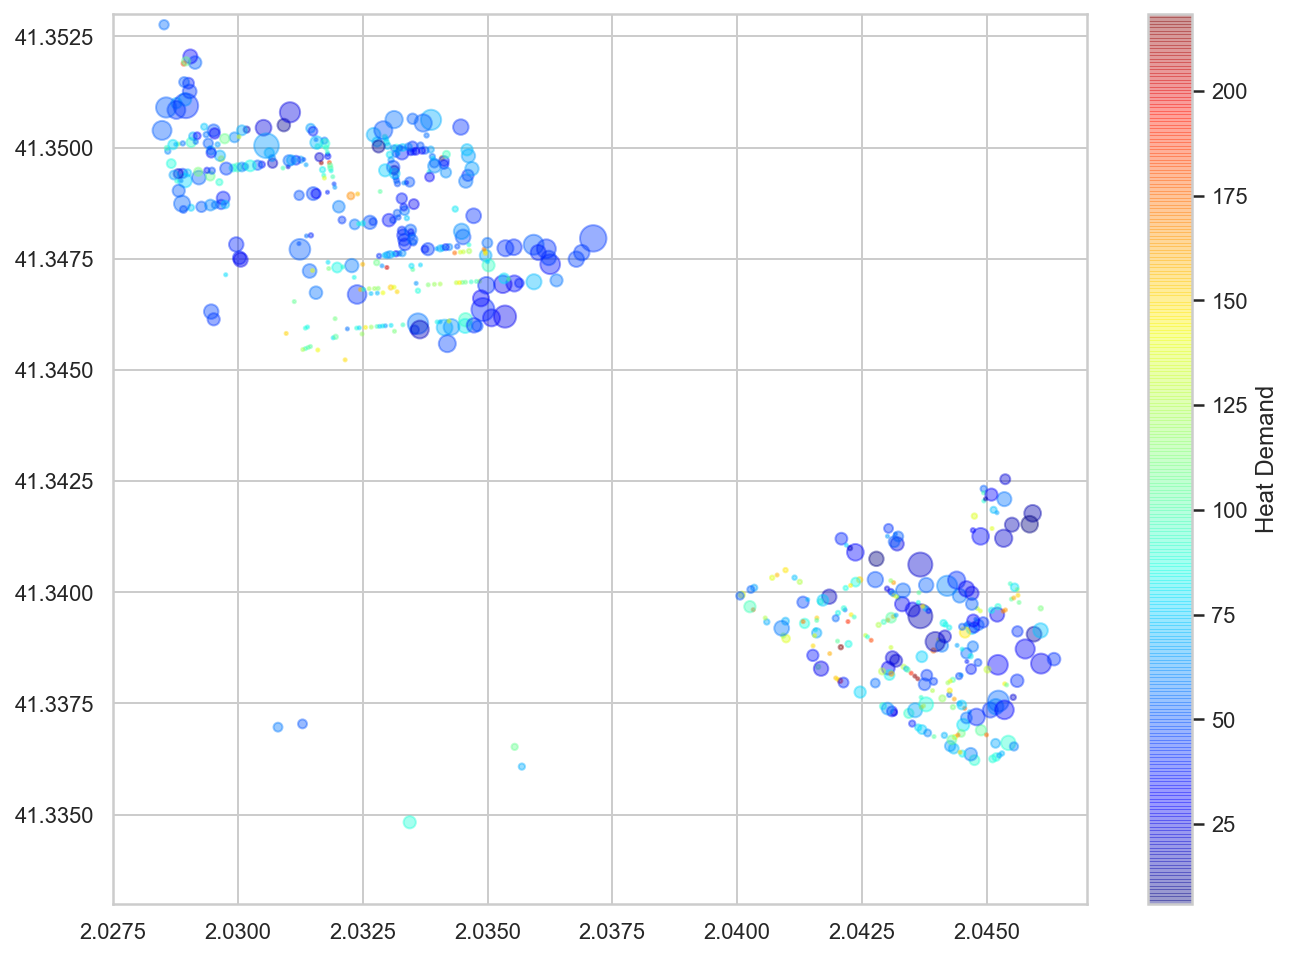

In [17]:
import matplotlib.patches as patches

x = buildings_train_set["X Coord"]
y = buildings_train_set["Y Coord"]
s = buildings_train_set["Number of Dwellings"]
c = buildings_train_set["Heat Demand"]
label = buildings_train_set["Number of Dwellings"]
cmap=plt.get_cmap('jet')

fig = plt.figure(figsize=(4*6,3*6))
ax = plt.subplot(221)
scat_1 = plt.scatter(x=x, y=y, label=label, alpha=0.4, s=s*2.5, c=c, cmap=cmap)
ax.set_xlim(2.0275, 2.0470)
ax.set_ylim(41.333, 41.353)
plt.colorbar(scat_1, label="Heat Demand")
plt.show()

## EDA Conclusions

* The older and smaller the buildings, the greater the Heat Demand Range.
* The size of the building is the most determining variable.
* Multivariable analysis was used to identify a greater number of data entry errors.

## Correlations

In [18]:
corr_matrix = buildings.corr()
corr_matrix["Heat Demand"].sort_values(ascending=False)

Heat Demand                  1.000000
X Coord                      0.131918
Party Wall Surface          -0.121931
Y Coord                     -0.213433
Number of Courtyards        -0.271266
Roof Surface                -0.351795
Contact w/Terrain Surface   -0.380477
Openings Surface            -0.387990
Year                        -0.413464
Facade Surface              -0.415852
Wrapping Surface            -0.464968
Number of Dwellings         -0.465891
Number of Floors            -0.627875
Name: Heat Demand, dtype: float64

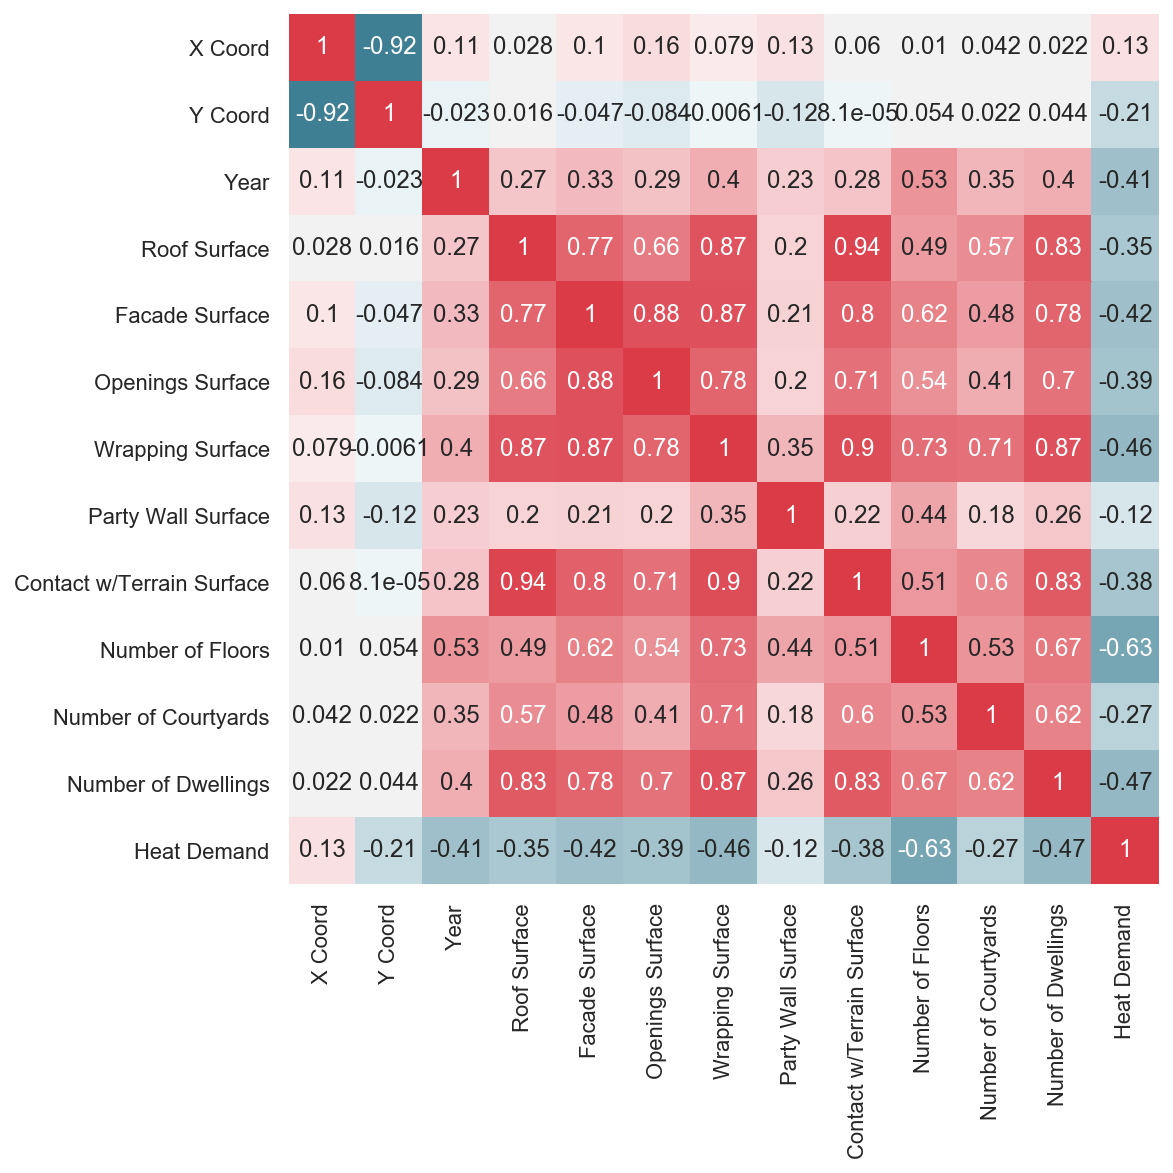

In [19]:
#show the correlations between all the numerical features in a heatmap
plt.figure(figsize = (8,8))
corr = buildings.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr, cmap=cmap, square=True, cbar=False, 
    annot=True, annot_kws={'fontsize':12}
)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.show()

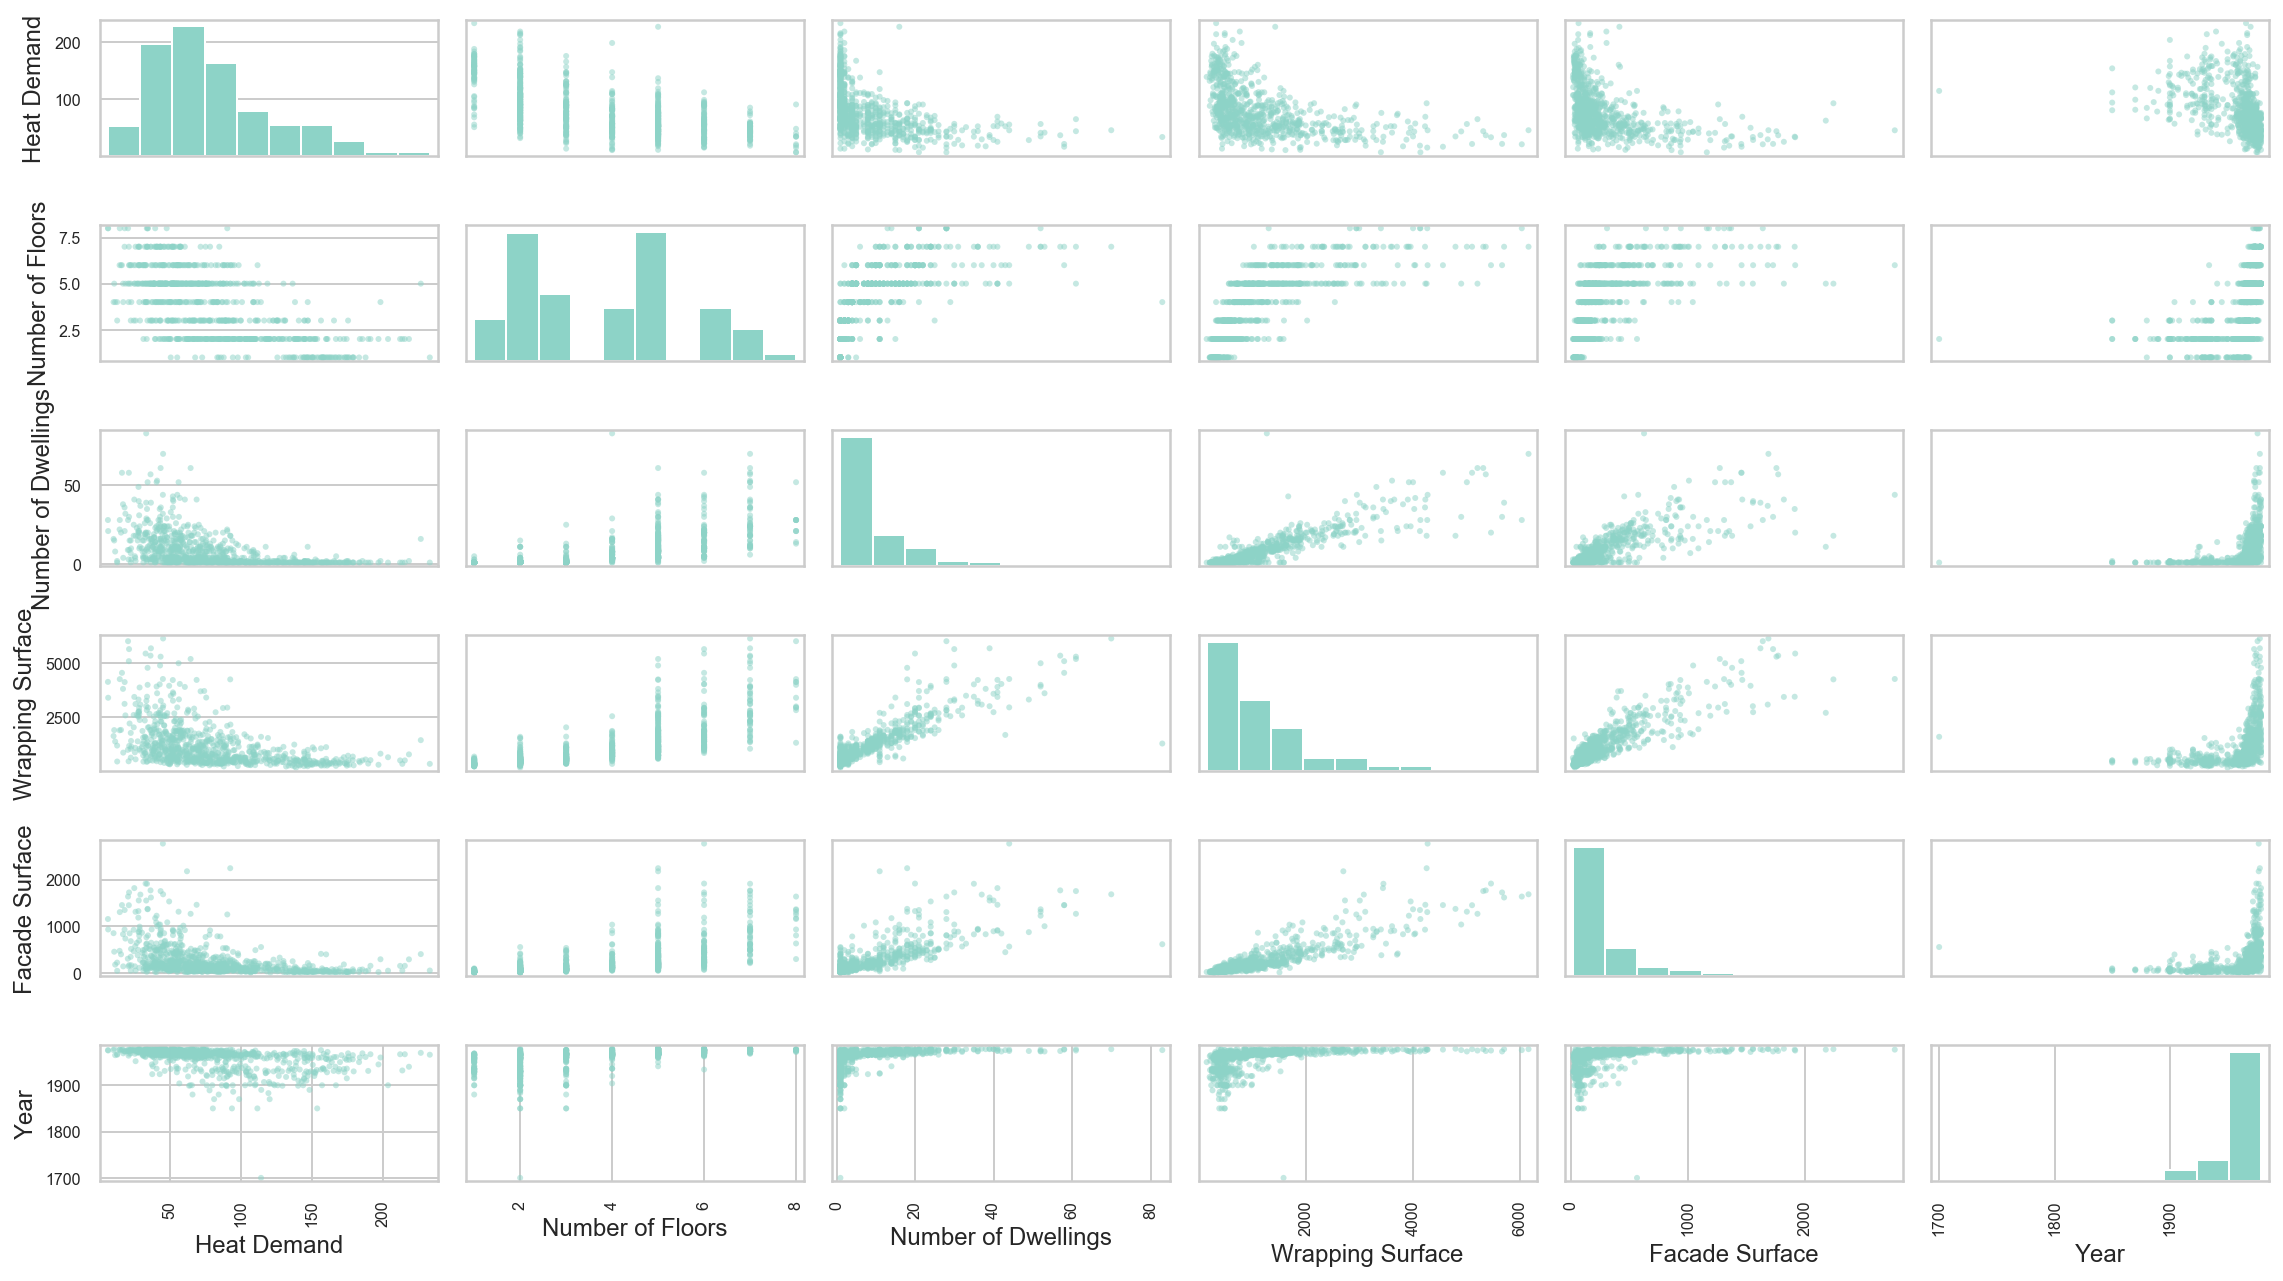

In [20]:
from pandas.plotting import scatter_matrix

attributes=["Heat Demand", "Number of Floors", "Number of Dwellings", 
            "Wrapping Surface", "Facade Surface", "Year"]
scatter_matrix(buildings[attributes], figsize=(16,9))
plt.tight_layout()
plt.show()

# Attribute Combination

Let's see if some Feature Engineering (through attribute combination and discretization) can be performed to gain more explicative variables (variables that are more correlated to Heat Demand).

First a discretization of certain variables was performed based on technical knowledge about how buildings and energy works.

In [21]:
labels = ["Before 1900", "From 1900 to 1940", "From 1941 to 1960", "From 1961 to 1971", "From 1971 to 1980"]
buildings["Period"] = pd.cut(x=buildings["Year"], bins=[-np.inf, 1899, 1940, 1960, 1970, 1980], labels=labels)

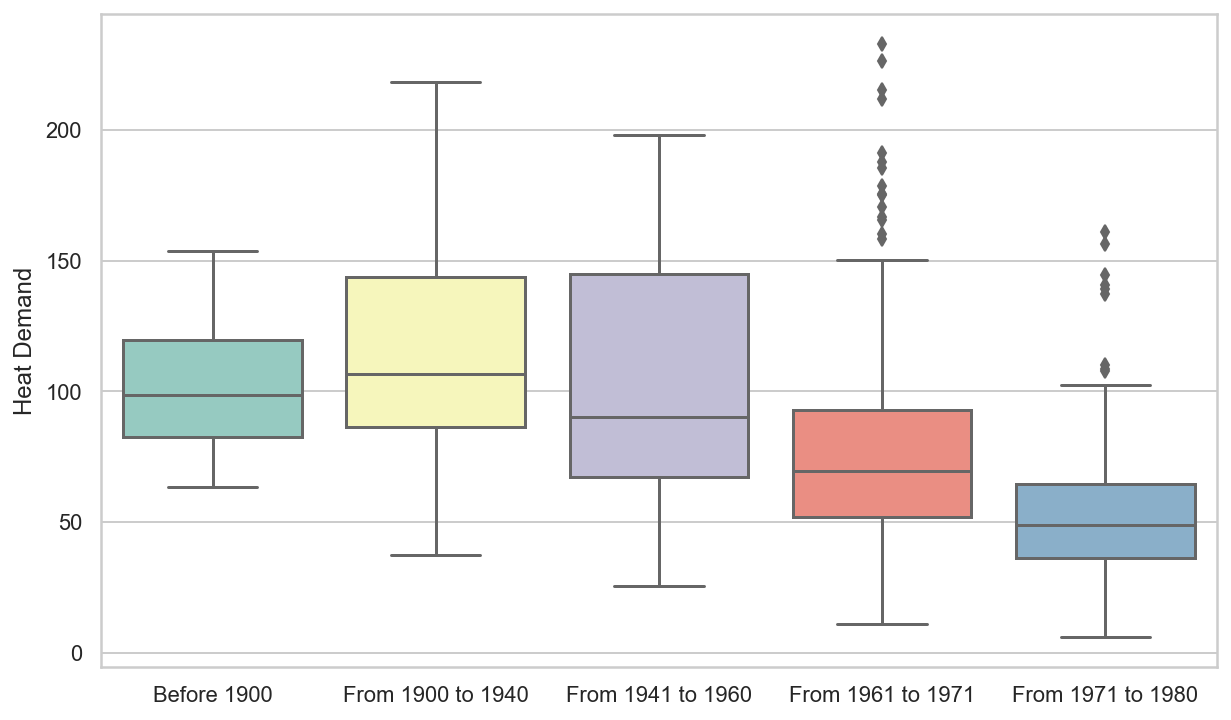

In [22]:
fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x="Period", y="Heat Demand", data=buildings, palette="Set3")
ax.set_xlabel("")
plt.show()

In [23]:
labels = ["Detached", "From 2 to \n4 dwellings","From 5 to \n9 dwellings", 
          "From 10 to \n19 dwellings","From 20 to \n39 dwellings", "40 dwellings \nor more"]
buildings["Dwellings Cat"] = pd.cut(x=buildings["Number of Dwellings"], bins=[0,1,4,9,19,39,np.inf], labels=labels)

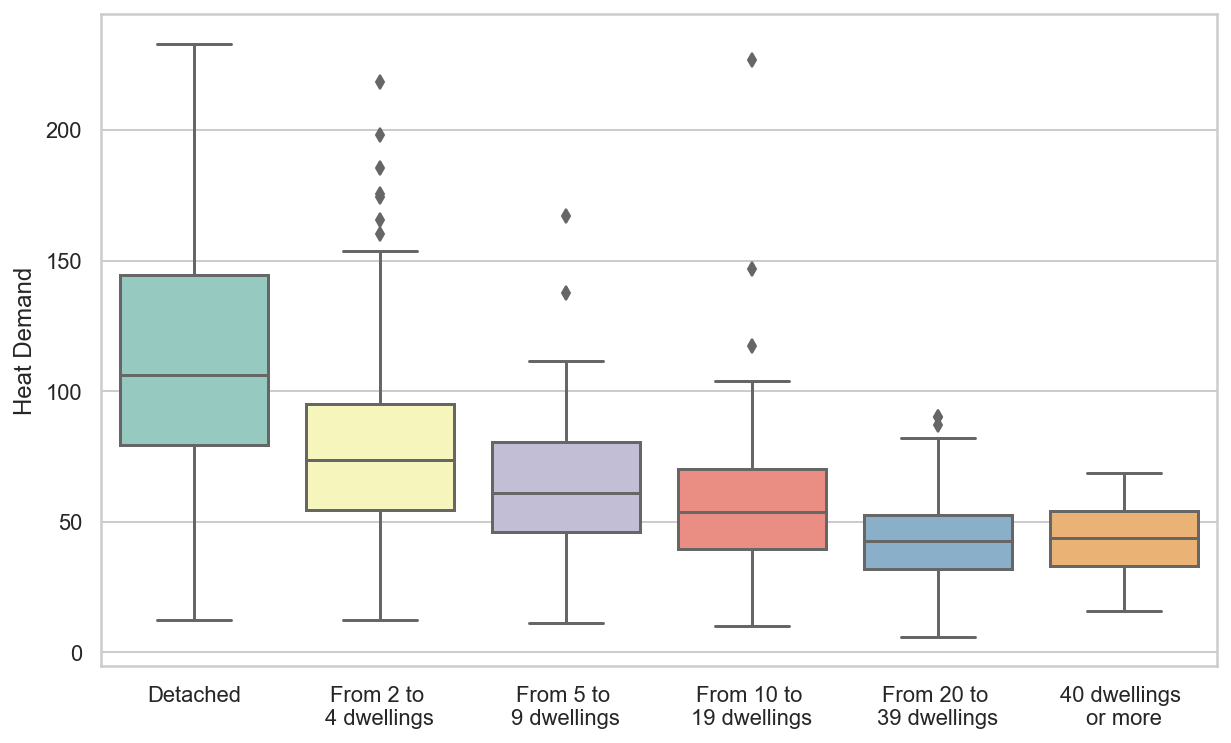

In [24]:
fig, ax = plt.subplots()
sns.boxplot(x="Dwellings Cat", y="Heat Demand", data=buildings, palette="Set3")
ax.set_xlabel("")
plt.show()

In [25]:
labels = ["No courtyard", "1 courtyard", "2 or more\n courtyards"]
buildings["Courtyards Cat"] = pd.cut(x=buildings["Number of Courtyards"], bins=[-np.inf, 0, 1, np.inf], labels=labels)

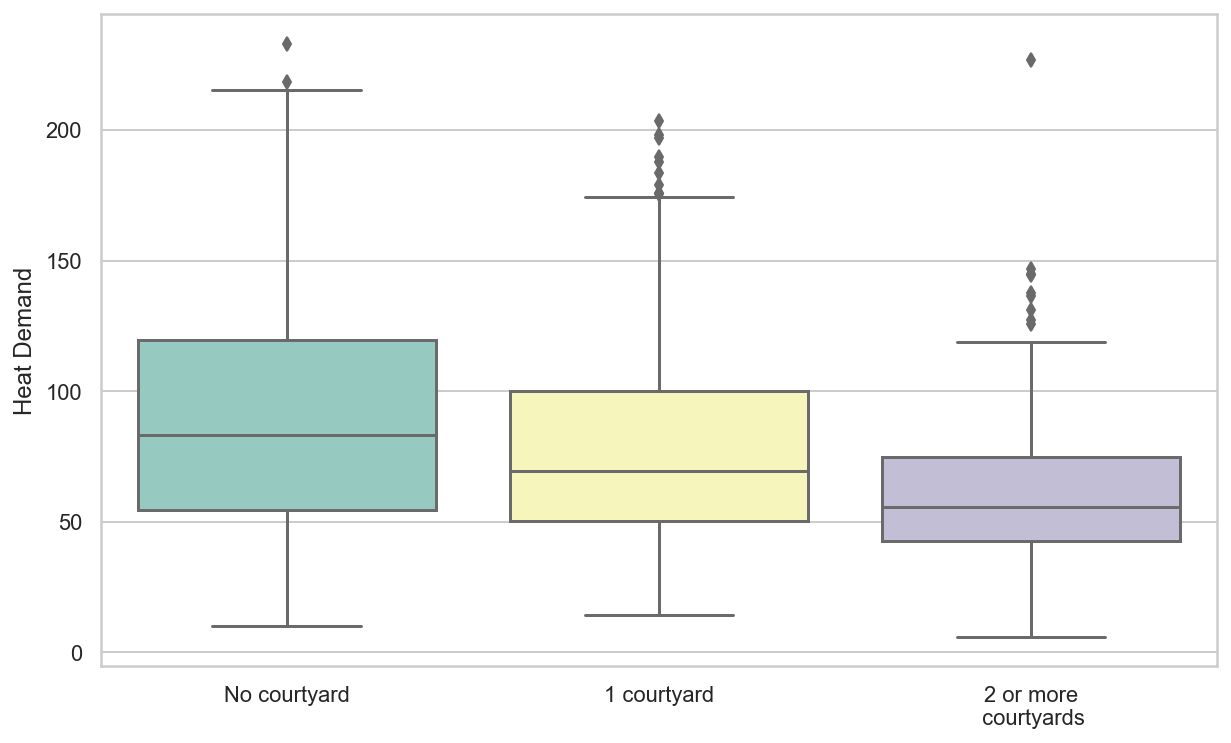

In [26]:
fig, ax = plt.subplots()
sns.boxplot(x="Courtyards Cat", y="Heat Demand", data=buildings, palette="Set3")
ax.set_xlabel("")
plt.show()

In [27]:
labels = ["No party wall", "Has party wall"]
buildings["Party Wall Cat"] = pd.cut(x=buildings["Party Wall Surface"], bins=[-np.inf,0, np.inf], labels=labels)

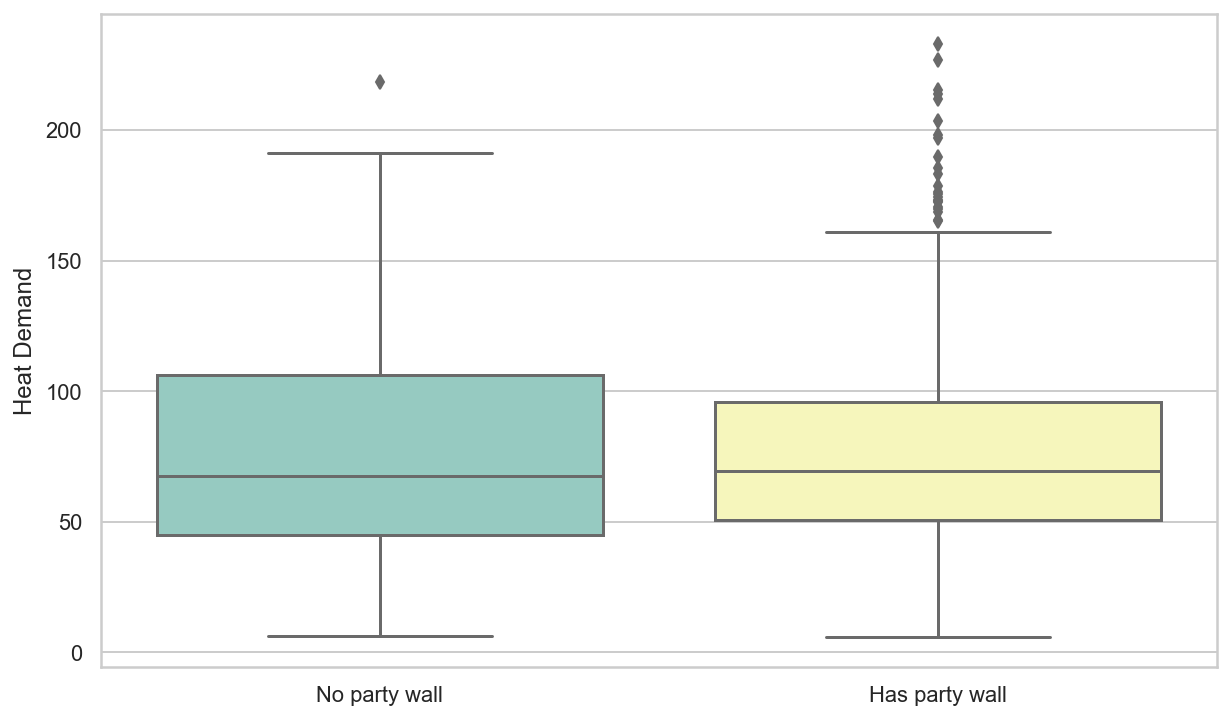

In [28]:
fig, ax = plt.subplots()
sns.boxplot(x="Party Wall Cat", y="Heat Demand", data=buildings, palette="Set3")
ax.set_xlabel("")
plt.show()

In [29]:
buildings["Wrapping Sfc. by Floor"] = buildings["Wrapping Surface"]/buildings["Number of Floors"]

In [30]:
corr_matrix = buildings.corr()
corr_matrix["Heat Demand"].sort_values(ascending=False)

Heat Demand                  1.000000
X Coord                      0.131918
Wrapping Sfc. by Floor      -0.095201
Party Wall Surface          -0.121931
Y Coord                     -0.213433
Number of Courtyards        -0.271266
Roof Surface                -0.351795
Contact w/Terrain Surface   -0.380477
Openings Surface            -0.387990
Year                        -0.413464
Facade Surface              -0.415852
Wrapping Surface            -0.464968
Number of Dwellings         -0.465891
Number of Floors            -0.627875
Name: Heat Demand, dtype: float64

At the same time that some differences can be observed between groups (except in the case of the Party Wall category) **there is not enough evidence to know whether these are systematic differences between the groups or simply random fluctuations** (it is very common to missinterpret results as the ones shown above).

A significant difference would produce boxplots with none or practically no overlapping values between groups. I.e., wiskers in the boxplots wouldn't be overlapped.

Here it must be remarked that with better quality data some patterns could have appeared at this point.

# Prepare Data for ML ALgorithms

## Data Cleaning 

### Outliers

Let's see the distribution of the attribute that is the potential target variable.

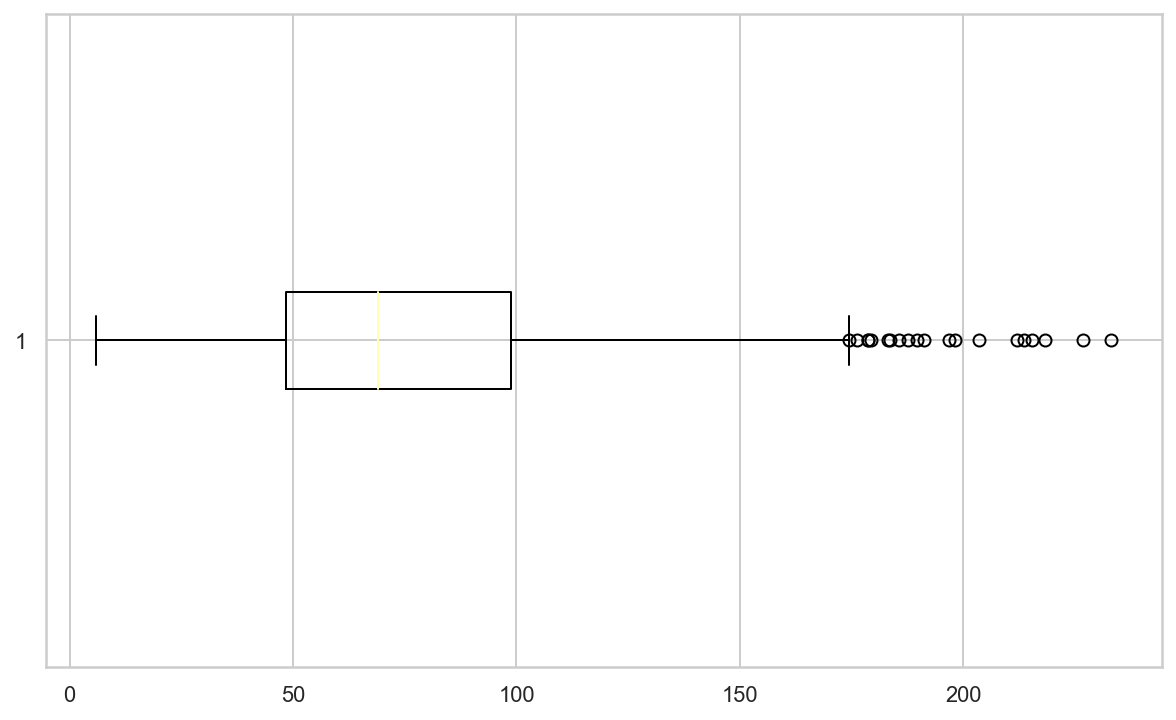

In [31]:
plt.boxplot(x=buildings_train_set["Heat Demand"], vert=False)
plt.show()

As we can see above, there are a few points over the 75% quantile of the distribution. It is hard to determine if all of them should be considered outliers.

If we use the IQR approach to delete outliers, we also have to take into account the lower part of the distribution.

In [32]:
def drop_outliers_by_iqr(df, variable):
    IQR = df[variable].quantile(.75) - df[variable].quantile(.25)
    low_limit = df[variable].quantile(.25) - 1.5*IQR
    top_limit = df[variable].quantile(.75) + 1.5*IQR
    
    outlier_condition = (df[variable] > low_limit) & (df[variable] < top_limit)
    return df[outlier_condition]

In [34]:
buildings_iqr = drop_outliers_by_iqr(buildings, variable="Heat Demand")
pctg = 100*(buildings.shape[0] - buildings_iqr.shape[0]) / (buildings.shape[0])
print("We would be deleting a {:.2f}% of the total rows".format(pctg))

We would be deleting a 2.46% of the total rows


Another approach is calculating the `z-score` and setting a threshold to consider wether a point is an outiler or not. We are taking a threshold of 3 (i.e., 3 standard deviations from the mean) and the absolute `z-score` value to simplify things.

In [35]:
from scipy import stats
import numpy as np

def drop_outliers_by_zscore(df, variable, threshold):    
    z_score = np.abs(stats.zscore(df[variable]))
    idx = np.where(z_score < threshold)
    return df.iloc[idx[0],]

In [36]:
buildings_z = drop_outliers_by_zscore(buildings, variable="Heat Demand", threshold=3)
sentence = "In this case, we would be deleting a "
pctg = 100*(buildings.shape[0] - buildings_z.shape[0]) / (buildings.shape[0])
print(sentence, "{:.2f}% of the data".format(pctg))

In this case, we would be deleting a  0.86% of the data


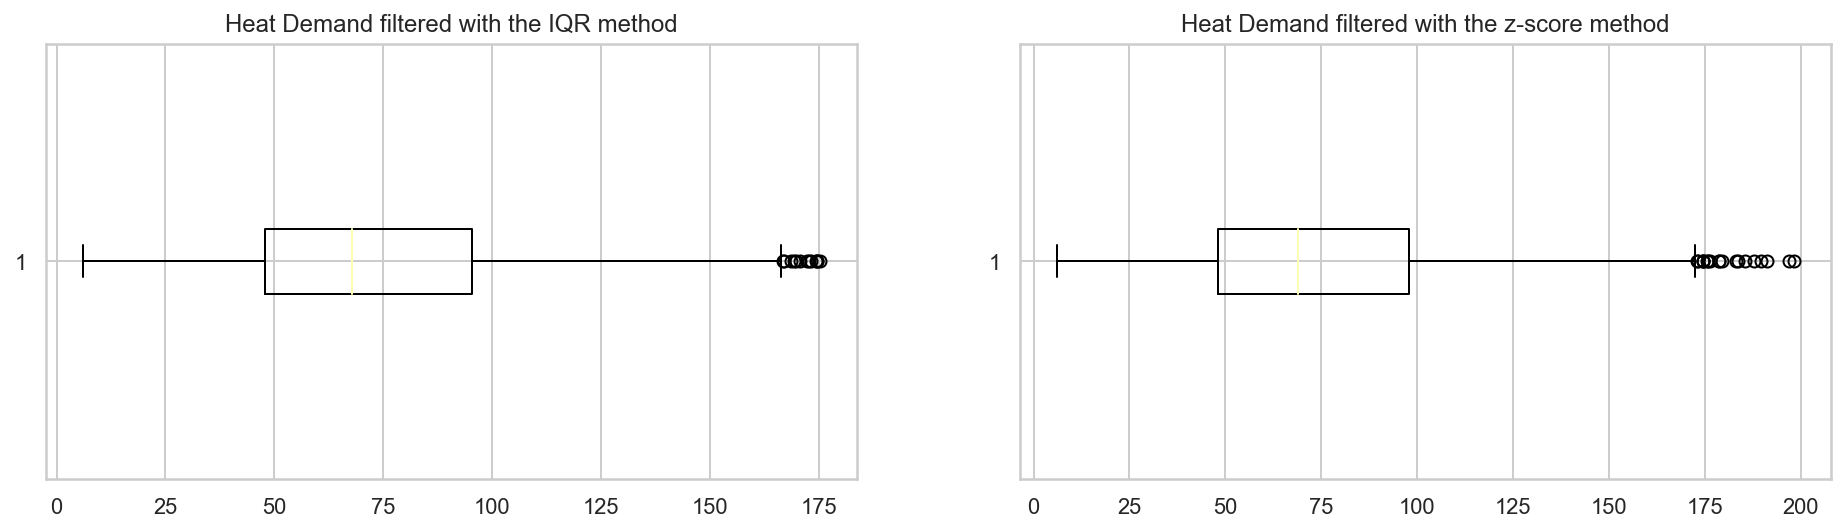

In [37]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.boxplot(buildings_iqr["Heat Demand"], vert=False)
plt.title("Heat Demand filtered with the IQR method")
plt.subplot(122)
plt.boxplot(buildings_z["Heat Demand"], vert=False)
plt.title("Heat Demand filtered with the z-score method")
plt.show()

### Categorical Attributes

Machine Learning Models require numerical data to be able to work. Then, categorical data must be treated before being feeded to them. There are two main ways to deal with them.

The following are the categorical attributes in the dataset.

In [38]:
buildings_cat = buildings.select_dtypes(("object", "category"))
buildings_cat_names = list(buildings_cat.columns.values)
buildings_cat_names

['District',
 'Main Orientation',
 'GF Usage',
 'Type of Roof',
 'Type of Opening',
 'Type of Party Wall',
 'Type of Facade',
 'Period',
 'Dwellings Cat',
 'Courtyards Cat',
 'Party Wall Cat']

Things we know about them are that those starting with "Type of" are variables related to the physical characteristics of the wraping surface. That is why they are also related to the surface transmitance. We can a apply an ordered transformation to those categories. This means that categories will be replaced by numbers in an speciffic order, which then will be interpreted in a hierarchical way by the model.

In [39]:
buildings_cat_names_order = [c for c in buildings_cat_names if c.startswith("Type")]

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
buildings_cat_encoded = ordinal_encoder.fit_transform(buildings_cat[buildings_cat_names_order])

Each column in the array represents an attribute.

In [44]:
buildings_cat_encoded

array([[1., 3., 2., 2.],
       [1., 2., 2., 2.],
       [1., 2., 2., 2.],
       ...,
       [2., 2., 0., 0.],
       [1., 3., 2., 2.],
       [1., 3., 0., 0.]])

The categories remain in the `ordinal_encoder`'s memory to be accessed any time. This will be specially handy when interpreting the results.

In [45]:
ordinal_encoder.categories_

[array(['C1', 'C2', 'C3', 'C4'], dtype=object),
 array(['H1', 'H2', 'H3', 'H4', 'H5'], dtype=object),
 array(['0', 'M1', 'M2', 'M3'], dtype=object),
 array(['F1', 'F2', 'F3'], dtype=object)]

The rest of them are going to be replaced by those known as dummy variables. This process is based on replacing the categorical attribute by a new column for each category in it and then asigning a 1 for the column corresponding to the instance's category and a 0 for the rest.

In [48]:
buildings_cat_names_1hot = [c for c in buildings_cat_names if c not in buildings_cat_order]

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
buildings_cat_1hot = cat_encoder.fit_transform(buildings_cat[buildings_cat_names_1hot])

Now, each column in the array corresponds to a category in the original attribute.

In [51]:
buildings_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [52]:
cat_encoder.categories_

[array(['Camps Blancs', 'Marianao', 'Vinyets'], dtype=object),
 array(['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], dtype=object),
 array(['Commercial', 'Dwelling', 'Industrial', 'Storage'], dtype=object),
 array(['Before 1900', 'From 1900 to 1940', 'From 1941 to 1960',
        'From 1961 to 1971', 'From 1971 to 1980'], dtype=object),
 array(['40 dwellings \nor more', 'Detached', 'From 10 to \n19 dwellings',
        'From 2 to \n4 dwellings', 'From 20 to \n39 dwellings',
        'From 5 to \n9 dwellings'], dtype=object),
 array(['1 courtyard', '2 or more\n courtyards', 'No courtyard'],
       dtype=object),
 array(['Has party wall', 'No party wall'], dtype=object)]

In the next section custom transformers will be defined to perform these transformations (attribute combination and outlier and categorical data treatment). This will make these transformations optional and combinable, and then will be tested in the workflow pipelines to see which one performs better.

## Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributes

class OutliersTreatment

class CategoricalTreatment

## Feature Scaling

## Transformation Pipelines

# Model Selection and Training

## Fine-Tunning (Random Search)

## Analyzing Errors

Simple models for simple problems work better.

# Model Testing

# Conclusions